# Failed Results Analysis

This notebook analyzes the `failed_results_with_ids.jsonl` file to understand the distribution of different error categories.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the plotting style
sns.set_theme(style="whitegrid")

In [2]:
# Define the file path
# Using relative path assuming notebook is in 'notebook/' and data is in 'data/'
file_path = '../data/failed_results_with_ids.jsonl'

# Check if file exists, if not try absolute path
if not os.path.exists(file_path):
    file_path = '/root/hsin_research/ruledistill-main/data/failed_results_with_ids.jsonl'

print(f"Reading file from: {file_path}")

# Read the JSONL file
try:
    df = pd.read_json(file_path, lines=True)
    print(f"Successfully loaded {len(df)} records.")
except Exception as e:
    print(f"Error loading file: {e}")

Reading file from: ../data/failed_results_with_ids.jsonl
Successfully loaded 2716 records.


In [3]:
# Display the first few rows to understand the structure
df.head()

,question,dataset_answer,program,program_ground_truth,raw_response,parsed_prediction,error_category,is_correct,id
0,what is the the interest expense in 2009?,380,"divide(100, 100), divide(3.8, #0)",380.0,"Not provided, insufficient data.",n/a,computation error (null prediction),False,0
1,"during the 2012 year , did the equity awards i...",,"multiply(607, 18.13), multiply(#0, const_1000)...",n/a,"11,000",11000.0,unknown (missing gt),False,1
2,what was the total operating expenses in 2018 ...,41932,"divide(9896, 23.6%)",41932.20339,41.88,41.88,computation error,False,2
3,what percentage of total cash and investments ...,53%,"divide(14001, 26302)",0.532317,53.13,53.13,computation error,False,3
4,what was the growth rate of the loans held-for...,56.25%,"divide(2.5, 1.6), divide(#0, 1.6)",0.5625,24%,0.24,computation error,False,5


Error Category Counts:
error_category
computation error                             2039
representation error (near match/rounding)     332
representation error (formulaic output)        238
unknown (missing gt)                            94
computation error (null prediction)             13
Name: count, dtype: int64


/tmp/ipykernel_1419457/2051228590.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")


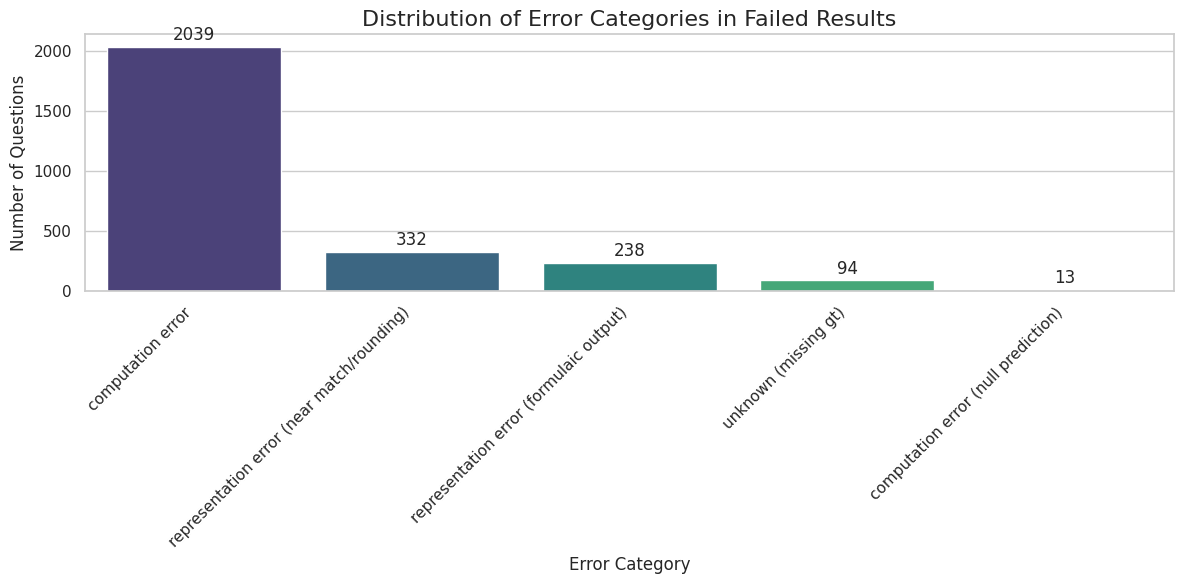

In [4]:
# Analyze 'error_category'
if 'error_category' in df.columns:
    # Count the occurrences of each error category
    error_counts = df['error_category'].value_counts()
    
    print("Error Category Counts:")
    print(error_counts)
    
    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=error_counts.index, y=error_counts.values, palette="viridis")
    
    # Labeling
    plt.title('Distribution of Error Categories in Failed Results', fontsize=16)
    plt.xlabel('Error Category', fontsize=12)
    plt.ylabel('Number of Questions', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    
    # Add count labels on top of bars
    for i, v in enumerate(error_counts.values):
        ax.text(i, v + (max(error_counts.values)*0.01), str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
else:
    print("Column 'error_category' not found in the dataframe.")